# Analysis of two Employee Exit Surveys (DETE) and (TAFE)

both DETE and TAFE use similar survey templates, with some deviation. 

The research question is to determine if jobs are ended due to dissatisfaction, specifically: 
	Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
	Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#import data
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
#dete
print(dete_survey.info())
print(dete_survey.head())
print(dete_survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [3]:
#tafe
print(tafe_survey.info())
print(tafe_survey.head())
print(tafe_survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [4]:
#remove columns not pertinant to the analysis
dete_survey_update = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_update = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)


Dropped columns from dete and tafe not related to the outcome measure to enhance readability, and improve merging downstream

In [5]:
#update dete
dete_survey_update.columns = (dete_survey_update.columns
                              .str.lower()
                              .str.strip()
                              .str.replace(' ', '_')
                             )

#update tafe
tafe_colnames_update = {'Record ID': 'id',
                        'CESSATION YEAR': 'cease_date',
                        'Reason for ceasing employment': 'separationtype',
                        'Gender. What is your Gender?': 'gender',
                        'CurrentAge. Current Age': 'age',
                        'Employment Type. Employment Type': 'employment_status',
                        'Classification. Classification': 'position',
                        'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
                       } #dictionary for readability in rename

#rename
tafe_survey_update = tafe_survey_update.rename(tafe_colnames_update, axis=1)

#print columns
print('DETE')
print(dete_survey_update.columns)
print()
print('TAFE')
print(tafe_survey_update.columns)


DETE
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

TAFE
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Sel

Changed the names of key columns (ID, cease_date, separationtype, gender, age, employment_status, position) to allow for downstream merging

In [6]:
print('DETE')
print(dete_survey_update['separationtype'].value_counts())
print()
print('TAFE')
print(tafe_survey_update['separationtype'].value_counts())

DETE
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

TAFE
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


I only need the resignations, other types will be dropped


dete has 3 values: 
Resignation-Other reasons, 
Resignation-Other employer, 
Resignation-Move overseas/interstate


tafe has 1 value:
Resignation

In [7]:
dete_resignations = dete_survey_update.loc[dete_survey_update['separationtype'].str.contains("Resignation", na=False),].copy()
tafe_resignations = tafe_survey_update.loc[tafe_survey_update['separationtype'].str.contains("Resignation", na=False),].copy()

In [8]:
#convert dete cease_date to float for compatibility with tafe
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'(?P<year>[1-2][0-9]{3})', expand=False).astype(float).copy()

In [9]:
print('dete')
print(dete_resignations['cease_date'].value_counts())
print()
print(dete_resignations['dete_start_date'].value_counts())

print()

print('tafe')
print(tafe_resignations['cease_date'].value_counts())

dete
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

tafe
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


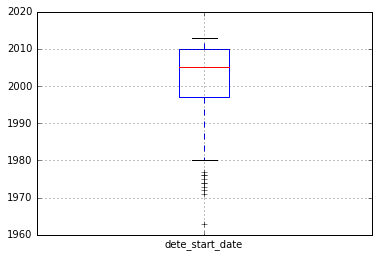

In [10]:
dete_resignations.boxplot('dete_start_date')

Values tend to be very similar for cease dates between groups.

dete may have outliers for start dates before 1980, however these will be included

In [11]:
#calculate years of service in dete with the same colname as tafe
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [12]:
#Disatisfaction infoprint
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [13]:
#function to convert '-' in tafe to false
def updatevals(text):
    if pd.isnull(text):
        return np.nan
    elif text == '-':
        return False
    else:
        return True


In [14]:
#extract dissatisfied info from tafe
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(updatevals).any(axis=1)

In [15]:
#dete resignations
dcvals = ['job_dissatisfaction',
          'dissatisfaction_with_the_department',
          'physical_work_environment',
          'lack_of_recognition',
          'lack_of_job_security',
          'work_location',
          'employment_conditions',
          'work_life_balance',
          'workload'
         ]
for i in dcvals:
    print(dete_resignations[i].value_counts())
    print()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64

False    305
True       6
Name: physical_work_environment, dtype: int64

False    278
True      33
Name: lack_of_recognition, dtype: int64

False    297
True      14
Name: lack_of_job_security, dtype: int64

False    293
True      18
Name: work_location, dtype: int64

False    288
True      23
Name: employment_conditions, dtype: int64

False    243
True      68
Name: work_life_balance, dtype: int64

False    284
True      27
Name: workload, dtype: int64



In [16]:
#since columns are already boolean indexed, dete can easily be sorted using any
dete_resignations['dissatisfied'] = dete_resignations[dcvals].any(axis = 1)

In [17]:
print('value counts for each:')
print('dete')
print(dete_resignations['dissatisfied'].value_counts())
print()
print('tafe')
print(tafe_resignations['dissatisfied'].value_counts())

value counts for each:
dete
False    162
True     149
Name: dissatisfied, dtype: int64

tafe
False    249
True      91
Name: dissatisfied, dtype: int64


Extracted `dissatisfied` responses from both dete and tafe into the `dissatisfied` column

In [18]:
#copy for further analysis
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [19]:
#create index column representing the institute for downstream analysis
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [20]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [21]:
#drop columns with LESS THAN 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis = 'columns').copy()

Data will be converted into the following: 

    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

In [22]:
combined_updated['institute_service'] = (combined_updated['institute_service']
                                         .astype(str).str.lower()
                                         .str.replace(r"[a-z]", "")
                                         .str.split(r'[.-]', expand=True, n=0)
                                         .iloc[:,0].str.strip()
                                        )
combined_updated.loc[combined_updated['institute_service']=="",'institute_service'] = np.nan
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

In [23]:
combined_updated['service_cat'] = 'New'
combined_updated.loc[combined_updated['institute_service'] >=3,'service_cat'] = 'Experienced'
combined_updated.loc[combined_updated['institute_service'] >=7,'service_cat'] = 'Established'
combined_updated.loc[combined_updated['institute_service'] >=11,'service_cat'] = 'Veteran'


In [24]:
#check the values
combined_updated.groupby(['institute_service', 'service_cat']).size()

institute_service  service_cat
0.0                New             20
1.0                New            159
2.0                New             14
3.0                Experienced     83
4.0                Experienced     16
5.0                Experienced     56
6.0                Experienced     17
7.0                Established     34
8.0                Established      8
9.0                Established     14
10.0               Established      6
11.0               Veteran         30
12.0               Veteran          6
13.0               Veteran          8
14.0               Veteran          6
15.0               Veteran          7
16.0               Veteran          5
17.0               Veteran          6
18.0               Veteran          5
19.0               Veteran          3
20.0               Veteran         17
21.0               Veteran          3
22.0               Veteran          6
23.0               Veteran          4
24.0               Veteran          4
25.0               

String objects were cleaned into int. When a range was presented, the lowest int was used. 

the lower limits of the ranges did not influence this as data was then agregated into labels similar to the ranges. 

In [25]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [26]:
#set na as False as this is not used
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

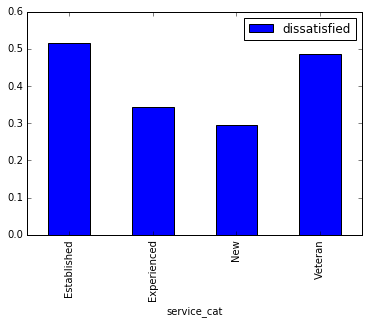

In [27]:
com_pivot = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')
com_pivot.plot(kind = 'bar')

Data Indexing: 

    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

New employees that leave are the least disatisfied

Vetran and Established (more than 7 years) that leave are the most dissatisfied

In [28]:
combined_updated.groupby(['service_cat', 'dissatisfied']).size()

service_cat  dissatisfied
Established  False            30
             True             32
Experienced  False           113
             True             59
New          False           198
             True             83
Veteran      False            70
             True             66
dtype: int64